# TITANIC SURVIVAL PREDICTION

### INTRODUCTION

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [30]:
# Importing Required Libraries

import pandas as pd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.filterwarnings("ignore")

In [3]:
tt = pd.read_csv(r"S:\CODSOFT\Titanic-Dataset.csv")

# 1. Data Preprocessing

In [4]:
tt.shape

(891, 12)

In [5]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tt.isnull().sum()[tt.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# 2. Data description
Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

**Survived:** 0 = Did not survive, 1 = Survived

**Pclass:** Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

**Sex:** Male or female

**Age:** Age in years, fractional if less than 1

**SibSp:** Number of siblings or spouses aboard the titanic

**Parch:** Number of parents or children aboard the titanic

**Ticket:** Passenger ticket number

**Fare:** Passenger fare

**Cabin:** Cabin number

**Embarked:** Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# 3. EDA

In [7]:
tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
 tt = tt.drop(['Name' , "Ticket" , "Cabin" , "PassengerId"], axis = 1)

**NOTE :**
So i have decided to drop Name, Ticket, Cabin and passanger ID these columns, as they don't be needed to predict the survival.

In [9]:
# Value counts of the Embarked column 
tt['Embarked'].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [10]:
tt[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Embarked Point')

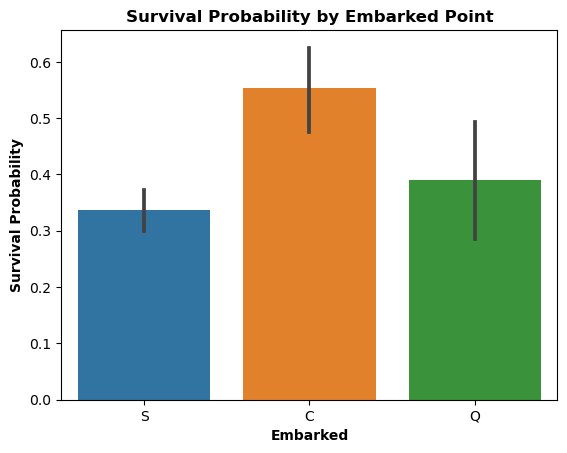

In [14]:
sns.barplot(x = 'Embarked', y ='Survived', data = tt )
plt.xlabel("Embarked" , fontweight = "bold")
plt.ylabel('Survival Probability', fontweight = "bold")
plt.title('Survival Probability by Embarked Point', fontweight = "bold")

Survival Probability at point C is maximum and lowest at point at S.

We can see that the majority of passangers embarked from point C and have highest survival probability.
alternatively, the passangers embarked from point S are low in numbers and hence point S has lowest survival probability.

In [15]:
tt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
tc =  tt

In [17]:
tc.isnull().sum()[tc.isnull().sum()>0]

Age         177
Embarked      2
dtype: int64

In [18]:
tc.Embarked.nunique()
tc.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
tc.Age.unique()
tc.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [21]:
tc.Age = le.fit_transform(tc.Age)
tc.Embarked = le.fit_transform(tc.Embarked)

In [22]:
tc

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,28,1,0,7.2500,2
1,1,1,female,51,1,0,71.2833,0
2,1,3,female,34,0,0,7.9250,2
3,1,1,female,47,1,0,53.1000,2
4,0,3,male,47,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,male,35,0,0,13.0000,2
887,1,1,female,24,0,0,30.0000,2
888,0,3,female,88,1,2,23.4500,2
889,1,1,male,34,0,0,30.0000,0


In [23]:
tc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 52.3+ KB


In [24]:
tc.Sex.replace({'female':0, 'male':1}, inplace = True)

In [25]:
tc

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28,1,0,7.2500,2
1,1,1,0,51,1,0,71.2833,0
2,1,3,0,34,0,0,7.9250,2
3,1,1,0,47,1,0,53.1000,2
4,0,3,1,47,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,13.0000,2
887,1,1,0,24,0,0,30.0000,2
888,0,3,0,88,1,2,23.4500,2
889,1,1,1,34,0,0,30.0000,0


# 4. Model Selection and training

### LOGISTIC REGRESSION

In [26]:
from sklearn.model_selection import train_test_split
tc_train, tc_test = train_test_split(tc, test_size =.2)

tc_train_x = tc_train.drop(['Survived'], axis = 1)
tc_train_y = tc_train.Survived

tc_test_x = tc_test.drop(['Survived'], axis = 1)
tc_test_y = tc_test.Survived

Here from train data 'Survived' is droped as it is a our Target Vriable, and hence it is taken into test data.


In [34]:
from sklearn.linear_model import LogisticRegression
logreg_tc = LogisticRegression()
logreg_tc.fit(tc_train_x, tc_train_y)

LogisticRegression()

In [35]:
pred_test = logreg_tc.predict(tc_test_x)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
tab = confusion_matrix(tc_test_y, pred_test)
tab

array([[94, 20],
       [19, 46]], dtype=int64)

In [37]:
tab_tc = pd.DataFrame(tab)
tab_tc.columns = ["NS" , "S" ]
tab_tc.index = ["NS" , "S"]
tab_tc

,NS,S
NS,94,20
S,19,46


In [38]:
print(classification_report(tc_test_y, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       114
           1       0.70      0.71      0.70        65

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [40]:
dt.fit(tc_train_x, tc_train_y)

DecisionTreeClassifier()

In [41]:
pred_test_dt = dt.predict(tc_test_x)

In [42]:
tab = confusion_matrix(tc_test_y, pred_test_dt)
tab

array([[92, 22],
       [15, 50]], dtype=int64)

In [43]:
tab_tc = pd.DataFrame(tab)
tab_tc.columns = ["NS" , "S" ]
tab_tc.index = ["NS" , "S"]
tab_tc

,NS,S
NS,92,22
S,15,50


In [44]:
print(classification_report(tc_test_y, pred_test_dt))


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       114
           1       0.69      0.77      0.73        65

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



### RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(tc_train_x, tc_train_y)

RandomForestClassifier()

In [46]:
pred_test_rfc = dt.predict(tc_test_x)

In [47]:
tab = confusion_matrix(tc_test_y, pred_test_rfc)
tab

array([[92, 22],
       [15, 50]], dtype=int64)

In [48]:
tab_tc = pd.DataFrame(tab)
tab_tc.columns = ["NS" , "S" ]
tab_tc.index = ["NS" , "S"]
tab_tc

,NS,S
NS,92,22
S,15,50


In [49]:
print(classification_report(tc_test_y, pred_test_rfc))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       114
           1       0.69      0.77      0.73        65

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



The metrics explains:

**Precision:** Precision focuses on the accuracy of the positive predictions, regardless of how many actual positive instances there are in the dataset. It tells us what proportion of positive predictions made by the model are actually correct.

**Recall (sensitivity):** It measures the ability of the model to capture all the positive values. It tells you what proportion of actual positives was identified correctly.

**F1-score:** This is the harmonic mean of precision and recall. It's a single metric that gives you an idea of the balance between precision and recall.

**Accuracy:** This is the overall accuracy of the model, which is the proportion of correctly predicted instances out of the total instances.

Overall, it seems like the model performs reasonably well, with good precision, recall, and F1-score for both classes, and a overall accuracy is good.

# 5. Model Evaluation

In [51]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest'],
    'Score': [0.83, 0.74, 0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.83,Logistic Regression
0.74,Decision Tree
0.74,Random Forest


Hence I will use Logistic Regression algorithm for training my model.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better happy learning!